# Feature Engineering Notebook

In [1]:
import pandas as pd
import sklearn as sk 
import rpy2 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas_datareader as web
import datetime
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 

In [256]:
pd.set_option('display.max_rows', 500)

In [212]:
df = pd.read_csv('/home/sauraj/spy.csv')

In [191]:
df['20-DayEMA'] = df['Adj Close'].rolling(window=20).mean()

# Dummy dataset for prototyping data labelling before implementing in on the whole dataset

In [214]:
df_dummy = df[0:200]
df_dummy

df_dummy

,Date,High,Low,Open,Close,Volume,Adj Close,5-DayEMA,20-DayEMA,20-DayEMAPct,5-DayEMAPct,SlowD,SlowK,MACD,MACD_Hist,MACD_Signal,CCI,OBV
0,2018-12-07,271.220001,262.630005,269.459991,263.570007,160907800,263.570007,269.298302,271.256475,-0.297392,-1.052367,54.1908,29.6418,-1.3835,0.0375,-1.4211,-94.4403,7763701979
1,2018-12-06,269.970001,262.440002,265.920013,269.839996,204185400,269.839996,272.162449,272.065577,-0.086034,-0.424854,71.9263,58.7621,-0.7825,0.6479,-1.4305,-77.2088,7924720902
2,2018-12-04,278.850006,269.899994,278.369995,270.250000,177986000,270.250000,273.323675,272.299849,-0.079178,-0.559134,76.5954,74.1685,-0.6425,0.9500,-1.5924,11.3390,8128906313
3,2018-12-03,280.399994,277.510010,280.279999,279.299988,103176300,279.299988,274.860513,272.515622,0.262745,0.814162,69.6785,82.8484,-0.4961,1.3338,-1.8299,118.4207,8306892326
4,2018-11-30,276.279999,273.450012,273.809998,275.649994,98204200,275.649994,272.640776,271.801479,0.149268,0.554927,55.0835,72.7695,-1.2235,0.9399,-2.1634,59.2236,8203874607
5,2018-11-29,275.549988,272.429993,273.709991,273.980011,82346400,273.980011,271.136166,271.396372,0.100309,0.527196,36.9121,53.4177,-1.7625,0.6358,-2.3984,41.2312,8105670417
6,2018-11-28,274.579987,268.329987,269.600006,274.579987,127629600,274.579987,269.714244,271.124410,0.134342,0.910228,23.0782,39.0634,-2.2548,0.3025,-2.5573,14.9196,8188016837
7,2018-11-27,268.399994,265.660004,266.339996,268.399994,75502400,268.399994,267.281373,270.760665,-0.091691,0.209698,11.9136,18.2553,-2.9115,-0.2785,-2.6330,-73.7650,8060387204
8,2018-11-26,267.750000,265.339996,265.779999,267.500000,79843900,267.500000,266.722063,271.009157,-0.136114,0.146046,9.2089,11.9160,-3.0780,-0.5147,-2.5633,-79.5359,7984884763
9,2018-11-23,264.820007,263.070007,263.179993,263.250000,42807900,263.250000,266.333094,271.378542,-0.314301,-0.575473,13.9806,5.5695,-3.1542,-0.7195,-2.4347,-134.1111,7904903401


In [215]:
df_dummy = df_dummy.sort_values(by='Date').reset_index()

In [216]:
df_dummy = df_dummy.drop(['index'],axis=1)

In [223]:
df_dummy

,Date,High,Low,Open,Close,Volume,Adj Close,5-DayEMA,20-DayEMA,20-DayEMAPct,5-DayEMAPct,SlowD,SlowK,MACD,MACD_Hist,MACD_Signal,CCI,OBV,StochasticTrend,AdjCloseTrend
0,2018-02-23,274.709991,271.250000,271.790009,274.709991,92766400,271.163513,268.349755,268.187576,0.116942,0.527034,64.2958,71.9563,-0.7862,0.3381,-1.1243,12.1180,9437420134,,
1,2018-02-26,278.010010,275.260010,275.929993,277.899994,86491400,274.312347,270.337286,268.770887,0.217501,0.740649,72.9039,86.1986,-0.1886,0.7486,-0.9372,59.4441,9523911540,Reversal,Up
2,2018-02-27,278.920013,274.359985,278.109985,274.429993,99099200,270.887115,270.520562,268.972433,0.074988,0.067796,83.5317,92.4402,0.0050,0.7537,-0.7488,56.4694,9424812375,Reversal,Down
3,2018-02-28,276.190002,271.290009,275.679993,271.649994,121907800,268.143005,269.728043,268.893440,-0.029368,-0.292961,87.8053,84.7769,-0.0652,0.5469,-0.6120,28.0015,9302904608,Reversal,Down
4,2018-03-01,273.170013,266.000000,271.410004,267.700012,176855100,264.244049,267.900045,268.450641,-0.164675,-0.677719,82.5852,70.5385,-0.4345,0.1420,-0.5765,-22.1927,9126049531,Down,Down
5,2018-03-02,269.720001,264.820007,265.799988,269.079987,139083200,265.606201,267.135431,268.179742,-0.100912,-0.285410,70.8673,57.2865,-0.6088,-0.0258,-0.5830,-31.3171,9265132748,Down,Up
6,2018-03-05,272.890015,267.609985,267.730011,272.190002,97307400,268.676025,267.648962,268.227007,0.017624,0.192236,60.0203,52.2359,-0.4904,0.0741,-0.5645,27.5985,9362440135,Down,Up
7,2018-03-06,273.390015,271.179993,273.299988,272.880005,79213200,269.357147,268.218357,268.334639,0.040127,0.212739,54.1240,52.8495,-0.3369,0.1820,-0.5190,51.8715,9441653298,Down,Up
8,2018-03-07,273.179993,270.200012,270.420013,272.779999,87063500,269.258453,268.565056,268.422621,0.032788,0.129260,54.1426,57.3424,-0.2209,0.2385,-0.4593,39.7800,9354589796,Up,Down
9,2018-03-08,274.239990,272.420013,273.549988,274.100006,66901200,270.561401,269.230504,268.626315,0.075885,0.247779,56.8369,60.3187,-0.0221,0.3498,-0.3719,63.2739,9421490946,Up,Up


In [21]:
df_dummy['CCI-pct%'] = df_dummy['CCI'].pct_change() * 100

In [22]:
df_dummy['AdjClose-pct%'] = df_dummy['Adj Close'].pct_change() * 100

In [23]:
df_dummy['Volume-pct%'] = df_dummy['Volume'].pct_change() * 100

In [127]:
for i in range(1, 200):
    if (df_dummy['MACD'][i] > df_dummy['MACD_Signal'][i]) & (((df_dummy['SlowD'][i] > 80) | (df_dummy['SlowK'][i] > 80))) or (((df_dummy['SlowD'][i] > 80) & (df_dummy['SlowK'][i] > 80))):

        df_dummy['Trend'][i] = 'Bullish'

    elif (df_dummy['MACD'][i] < df_dummy['MACD_Signal'][i]) & (((df_dummy['SlowD'][i] < 20) | (df_dummy['SlowK'][i] < 20))) or (((df_dummy['SlowD'][i] < 20) & (df_dummy['SlowK'][i] < 20))):

        df_dummy['Trend'][i] = 'Bearish'
    
    #elif(df_dummy['CCI-pct%'][i] < -100):

#        df_dummy['Trend'][i] = 'Reversal'
        
 #   else:
  #      df_dummy['Trend'][i] = 'Reversal'
    #elif(df_dummy['5-DayEMA'][i] < df_dummy['20-DayEMA'][i]) | (df_dummy['MACD'][i] > df_dummy['MACD_Signal'][i]):
        #df_dummy['Trend'] = 'Reversal'
    

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [75]:
(((df_dummy['SlowD'][198] > 80) | (df_dummy['SlowK'][198] > 80))) or (((df_dummy['SlowD'][198] > 80) & (df_dummy['SlowK'][198] > 80)))

True

In [106]:
(df_dummy['SlowD'][i] < df_dummy['SlowD'][i-1]) and (df_dummy['SlowK'][i] < df_dummy['SlowK'][i-1]) <= 80

True

In [124]:
for i in range(1, 200):
    if (df_dummy['SlowK'][i] < df_dummy['SlowD'][i-1]) and (df_dummy['SlowK'][i] < df_dummy['SlowK'][i-1]) and ((df_dummy['SlowD'][i] and df_dummy['SlowK'][i] < 80)):
        df_dummy['StochasticTrend'][i] = 'Up'
    elif (df_dummy['SlowD'][i] > df_dummy['SlowD'][i-1]) and (df_dummy['SlowK'][i] > df_dummy['SlowK'][i-1]) and ((df_dummy['SlowD'][i] and df_dummy['SlowK'][i] < 80)):
        df_dummy['StochasticTrend'][i] = 'Down'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Feature Engineering 

The goal is to first create new features out of the indicators and then use them to create the target label **Market Trend** and label each row according to the pre-requisite conditions

### Stochastic Oscilator 

In [219]:
for i in range(1, 200):
    if (df_dummy['SlowD'][i] and df_dummy['SlowK'][i] > df_dummy['SlowD'][i-1] and df_dummy['SlowK'][i-1]):
        df_dummy['StochasticTrend'][i] = 'Up'
    if (df_dummy['SlowD'][i] and df_dummy['SlowK'][i] < df_dummy['SlowD'][i-1] and df_dummy['SlowK'][i-1]):
        df_dummy['StochasticTrend'][i] = 'Down'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [167]:
for i in range(1, 200):
    if (df_dummy['SlowK'][i] and df_dummy['SlowD'][i] > 80) or (df_dummy['SlowD'][i] or df_dummy['SlowK'][i] > 80) == True:
        df_dummy['StochasticTrend'][i] = 'Reversal'
    if (df_dummy['SlowK'][i] and df_dummy['SlowD'][i] < 20) or (df_dummy['SlowD'][i] or df_dummy['SlowK'][i] < 20) == True:
        df_dummy['StochasticTrend'][i] = 'Reversal'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [281]:
for i in range(1, 200):
    if (df_dummy['SlowD'][i] and df_dummy['SlowK'][i] > 80) and (df_dummy['SlowD'][i] or df_dummy['SlowK'][i] > 80):
        df_dummy['StochasticTrend'][i] = 'Reversal'
    if (df_dummy['SlowD'][i] and df_dummy['SlowK'][i] < 20) and (df_dummy['SlowD'][i] or df_dummy['SlowK'][i] < 20):
        df_dummy['StochasticTrend'][i] = 'Reversal'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### AdjClose Trend

In [221]:
#AdjClose Price trend feature 
df_dummy['AdjCloseTrend'] = ''

In [277]:
#Feature filling ^
for i in range(1, 200):
    if df_dummy['Adj Close'][i] > df_dummy['Adj Close'][i-1]:
        df_dummy['AdjCloseTrend'][i] = 'Up'
    if df_dummy['Adj Close'][i] < df_dummy['Adj Close'][i-1]:
        df_dummy['AdjCloseTrend'][i] = 'Down'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### On BalanceVolume (OBV) Trend

In [276]:
#df_dummy['OBVTrend'] = ''

for i in range(1, 200):
    if df_dummy['OBV'][i] > df_dummy['OBV'][i-1]:
        df_dummy['OBVTrend'][i] = 'Up'
    if df_dummy['OBV'][i] < df_dummy['OBV'][i-1]:
        df_dummy['OBVTrend'][i] = 'Down'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### MACD Trend

In [233]:
#df_dummy['MACDTrend'] = ''

for i in range(1, 200):
    if (df_dummy['MACD'][i] > df_dummy['MACD'][i-1]) and (df_dummy['MACD_Signal'][i] > df_dummy['MACD_Signal'][i-1]):
        df_dummy['MACDTrend'][i] = 'Up'
        
    if (df_dummy['MACD'][i] < df_dummy['MACD'][i-1]) and (df_dummy['MACD_Signal'][i] < df_dummy['MACD_Signal'][i-1]):
        df_dummy['MACDTrend'][i] = 'Down'
    else:
        df_dummy['MACDTrend'][i] = 'Reversal'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### CCI Trend

In [252]:
#df_dummy['CCITrend'] = ''

for i in range(1, 200):
    if df_dummy['CCI'][i] > df_dummy['CCI'][i-1]:
        df_dummy['CCITrend'][i] = 'Up'
    if df_dummy['CCI'][i] < df_dummy['CCI'][i-1]:
        df_dummy['CCITrend'][i] = 'Down'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [254]:
for i in range(1, 200):
    if df_dummy['CCI'][i] > 100 or df_dummy['CCI'][i] < -100:
        df_dummy['CCITrend'][i] = 'Reversal'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# How does the data look after feature engineering done above?

In [288]:
df_dummy.head(20)
#Drop RSI feature
#Use SPY's beta

,Date,High,Low,Open,Close,Volume,Adj Close,5-DayEMA,20-DayEMA,20-DayEMAPct,5-DayEMAPct,SlowD,SlowK,MACD,MACD_Hist,MACD_Signal,CCI,OBV,StochasticTrend,AdjCloseTrend,OBVTrend,MACDTrend,CCITrend,MarketTrend
0,2018-02-23,274.709991,271.250000,271.790009,274.709991,92766400,271.163513,268.349755,268.187576,0.116942,0.527034,64.2958,71.9563,-0.7862,0.3381,-1.1243,12.1180,9437420134,,,,,,
1,2018-02-26,278.010010,275.260010,275.929993,277.899994,86491400,274.312347,270.337286,268.770887,0.217501,0.740649,72.9039,86.1986,-0.1886,0.7486,-0.9372,59.4441,9523911540,Reversal,Up,Up,Up,Up,
2,2018-02-27,278.920013,274.359985,278.109985,274.429993,99099200,270.887115,270.520562,268.972433,0.074988,0.067796,83.5317,92.4402,0.0050,0.7537,-0.7488,56.4694,9424812375,Reversal,Down,Down,Up,Down,
3,2018-02-28,276.190002,271.290009,275.679993,271.649994,121907800,268.143005,269.728043,268.893440,-0.029368,-0.292961,87.8053,84.7769,-0.0652,0.5469,-0.6120,28.0015,9302904608,Reversal,Down,Down,Reversal,Down,
4,2018-03-01,273.170013,266.000000,271.410004,267.700012,176855100,264.244049,267.900045,268.450641,-0.164675,-0.677719,82.5852,70.5385,-0.4345,0.1420,-0.5765,-22.1927,9126049531,Down,Down,Down,Reversal,Down,
5,2018-03-02,269.720001,264.820007,265.799988,269.079987,139083200,265.606201,267.135431,268.179742,-0.100912,-0.285410,70.8673,57.2865,-0.6088,-0.0258,-0.5830,-31.3171,9265132748,Down,Up,Up,Down,Down,
6,2018-03-05,272.890015,267.609985,267.730011,272.190002,97307400,268.676025,267.648962,268.227007,0.017624,0.192236,60.0203,52.2359,-0.4904,0.0741,-0.5645,27.5985,9362440135,Down,Up,Up,Up,Up,
7,2018-03-06,273.390015,271.179993,273.299988,272.880005,79213200,269.357147,268.218357,268.334639,0.040127,0.212739,54.1240,52.8495,-0.3369,0.1820,-0.5190,51.8715,9441653298,Down,Up,Up,Up,Up,
8,2018-03-07,273.179993,270.200012,270.420013,272.779999,87063500,269.258453,268.565056,268.422621,0.032788,0.129260,54.1426,57.3424,-0.2209,0.2385,-0.4593,39.7800,9354589796,Up,Down,Down,Up,Down,
9,2018-03-08,274.239990,272.420013,273.549988,274.100006,66901200,270.561401,269.230504,268.626315,0.075885,0.247779,56.8369,60.3187,-0.0221,0.3498,-0.3719,63.2739,9421490946,Up,Up,Up,Up,Up,


# Creating the target feature: Market Trend

* Condition for Reversal = Both "StochasticTrend" and "CCITrend" need to be "Reversal"
* Condition for Bull/Bear = OBVTrend and AdjCloseTrend both need to be "Up" or "Down" to label them Bullish or Bearish

In [287]:
df_dummy['MarketTrend'] = ''

for i in range(1, 200):
    if (df_dummy['StochasticTrend'][i] == 'Reversal') & (df_dummy['CCITrend'][i] == 'Reversal'):
        df_dummy['MarketTrend'][i] = 'Reversal'


/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [285]:
for i in range(1, 200):

    if (df_dummy['OBVTrend'][i] == 'Up') & (df_dummy['AdjCloseTrend'][i] == 'Up'):
            df_dummy['MarketTrend'][i] = 'Bullish'
    
    if (df_dummy['OBVTrend'][i] == 'Down') & (df_dummy['AdjCloseTrend'][i] == 'Down'):
            df_dummy['MarketTrend'][i] = 'Bearish'

/home/sauraj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



KeyboardInterrupt: 

# Some basic visualization to check features

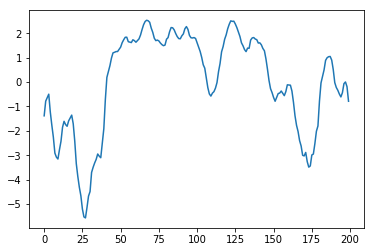

In [145]:
df_dummy['MACD'].plot()

# Detrending Data and then testing for its hypothesis

In [147]:
from scipy.signal import detrend
k = detrend(df_dummy['Adj Close'])

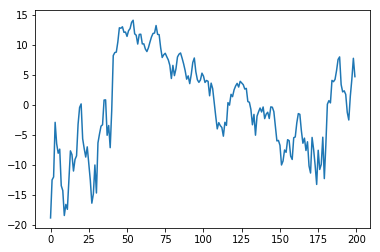

In [150]:
plt.plot(k)

In [161]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_dummy['RSI'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.908188
p-value: 0.044404
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


In [163]:
detrend_dfdummy = detrend(df_dummy)

In [167]:
df2 = pd.DataFrame(detrend_dfdummy)

In [179]:
df2 = pd.concat([df2, trend], axis=1)

## Detrend Data Classification prototyping

In [181]:
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Trend
0,-2.247978e+07,-2.082336e+07,-1.916693e+07,-1.751051e+07,1.450535e+08,-1.419766e+07,-1.254123e+07,-1.088480e+07,-9.228650e+06,-7.572226e+06,-5.915758e+06,-4.259320e+06,-2.602920e+06,-9.465258e+05,709900.582350,2.366324e+06,Reversal
1,-2.852591e+07,-2.642399e+07,-2.432206e+07,-2.222013e+07,1.840669e+08,-1.801627e+07,-1.591434e+07,-1.381241e+07,-1.171075e+07,-9.608823e+06,-7.506847e+06,-5.404892e+06,-3.302976e+06,-1.201107e+06,900823.987606,3.002751e+06,Up
2,-2.486570e+07,-2.303348e+07,-2.120124e+07,-1.936902e+07,1.604489e+08,-1.570456e+07,-1.387233e+07,-1.204010e+07,-1.020814e+07,-8.375913e+06,-6.543636e+06,-4.711376e+06,-2.879149e+06,-1.046994e+06,785237.398238,2.617465e+06,Up
3,-1.441435e+07,-1.335222e+07,-1.229009e+07,-1.122796e+07,9.301019e+07,-9.103699e+06,-8.041574e+06,-6.979446e+06,-5.917588e+06,-4.855457e+06,-3.793273e+06,-2.731128e+06,-1.668985e+06,-6.069378e+05,455194.144036,1.517321e+06,Up
4,-1.371972e+07,-1.270877e+07,-1.169783e+07,-1.068688e+07,8.852799e+07,-8.664985e+06,-7.654041e+06,-6.643095e+06,-5.632420e+06,-4.621473e+06,-3.610475e+06,-2.599525e+06,-1.588560e+06,-5.776876e+05,433261.296896,1.444205e+06,Up


In [182]:
X = df2.drop(['Trend'], axis=1)
y = df2['Trend']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=41)

In [199]:
svc = SVC(kernel='rbf')
svc_crossval = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

## 10-Fold CV prediction accuracy after data detrending

In [201]:
svc_crossval

array([0.44444444, 0.29411765, 0.5       , 0.3125    , 0.4375    ,
       0.625     , 0.5625    , 0.46666667, 0.53333333, 0.33333333])

## PCA Decompostion Classification prototyping

In [206]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_dummy)
pca_df = pca.transform(df_dummy)

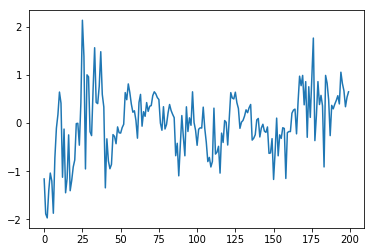

In [213]:
pca_df  = pd.DataFrame(pca_df)
pca_df[8].plot()

In [221]:
pca_df = pca_df.loc[~pca_df.index.duplicated(keep='first')]

In [229]:
pca_df = pd.concat([pca_df, trend], axis=1)

In [243]:
pca_df
X = pca_df.drop(['Trend'], axis=1)
y = pca_df['Trend']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45)

In [241]:
le.fit(pca_df['Trend'])
pca_df['Trend'] = le.transform(pca_df['Trend'])

In [242]:
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Trend
0,7.38489e+07,-7.281628,-6.745461,-15.071427,-2.394193,-0.585417,0.568720,-2.882756,-1.159455,-0.035358,-0.890222,-0.424307,0.108338,0.007568,0.002253,5.087336e-05,1
1,1.17127e+08,-64.160977,-5.816051,-4.344642,-5.324791,8.123000,-1.141810,0.607613,-1.883690,-0.843007,0.136841,0.534956,-0.119759,-0.000954,0.001161,3.646168e-05,2
2,9.09271e+07,-66.787263,-1.143747,1.441741,-0.262229,-3.971843,0.867057,-1.943881,-1.968743,-0.198917,-0.832988,-0.570736,0.026536,0.000351,-0.000731,-5.882083e-05,2
3,1.61174e+07,-31.621164,2.451572,11.002501,-0.032342,-0.843311,2.998169,0.637252,-1.401736,-1.373935,0.447391,-0.534885,0.097196,-0.012952,0.000474,2.163371e-06,2
4,1.11453e+07,-9.271632,-3.214839,13.265084,1.763698,1.313601,0.423676,0.969663,-1.037533,-0.876289,-0.763645,-0.131399,-0.001606,-0.008974,-0.000792,-3.057222e-06,2
5,-4.71246e+06,25.702818,-1.238869,11.969877,1.236275,-0.442750,1.169990,0.052128,-1.203251,-0.751379,-0.591173,-0.211438,0.052572,-0.002620,-0.000138,5.664151e-05,1
6,4.05707e+07,21.259990,4.724283,15.049274,-5.933230,3.779309,2.075537,0.371082,-1.871819,0.249001,0.015373,-0.428665,0.138935,0.006661,-0.001807,2.290468e-06,1
7,-1.15565e+07,74.693166,-5.351082,4.152091,0.874767,2.085995,0.062390,-0.396098,-0.721615,-0.883007,0.018997,0.127594,0.118945,0.004933,-0.001046,-4.488676e-07,0
8,-7.21496e+06,78.999520,-4.703735,1.806379,0.323276,2.016333,0.278991,-0.536042,-0.105161,-1.056285,0.011317,-0.041093,0.218929,0.005485,-0.001667,7.038545e-06,0
9,-4.4251e+07,102.419219,-14.234611,-9.534741,7.230076,1.527535,-1.618756,-1.048471,0.179055,-0.527628,-0.725104,0.309313,0.123789,-0.003330,0.000317,-6.072111e-06,0


In [245]:
svc_crossval = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/home/sauraj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 

## 10-Fold CV after PCA decomposition (n_features were not selected here, so all the principal components were utilized for training)

In [250]:
svc_crossval

array([0.44444444, 0.44444444, 0.44444444, 0.5       , 0.46666667,
       0.46666667, 0.46666667, 0.46666667, 0.46666667, 0.46666667])

# Min-Max scaling